# Data Quality
Evaluate the data quality of the given dataset

## 1. Constants

In [1]:
h5ad_path = "/mnt/workspace_stud/mbentse/catlas_objects/esophagus_muscularis_SM-A8CPH.h5ad"

## 2. Imports

## 3. Read h5ad files and build anndata objects

In [2]:
# Import packages
import episcanpy as epi
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 3. Read h5ad files and build anndata objects

In [3]:
adata = epi.read_h5ad(h5ad_path)

## 4. Add Metrics

In [4]:
# compute metrics
sc.pp.calculate_qc_metrics(adata=adata, percent_top=None, inplace=True)

## 5. Inspect Data

In [5]:
adata

AnnData object with n_obs × n_vars = 10997 × 1154611
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

In [6]:
adata.obs

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts
index,,,,
esophagus_muscularis_SM-A8CPH_1+AAGCTATACCGCTTCTCACAAG,6264,8.742734,10835.0,9.290629
esophagus_muscularis_SM-A8CPH_1+AATTCGGATGAAATGCTACGGG,827,6.719013,1365.0,7.219642
esophagus_muscularis_SM-A8CPH_1+ACTGCACAGAGTCCAGATTTCC,2334,7.755767,4000.0,8.294300
esophagus_muscularis_SM-A8CPH_1+AGGTCACTGAGCTTACAATCGT,768,6.645091,1181.0,7.074963
esophagus_muscularis_SM-A8CPH_1+AGTCGGAACGCCCAAGATCGAC,2940,7.986505,4891.0,8.495357
...,...,...,...,...
esophagus_muscularis_SM-A8CPH_1+CCATCTGGCATGCGATCGTTAG,1612,7.385851,2685.0,7.895808
esophagus_muscularis_SM-A8CPH_1+TTATGGATGCAAAGGATCGGCT,539,6.291569,888.0,6.790097
esophagus_muscularis_SM-A8CPH_1+ACGTGTTGGTGAGTGTGGCATA,1005,6.913737,1593.0,7.374002


In [7]:
# Basic statistics
total_elements = adata.shape[0] * adata.shape[1]
non_zero_elements = adata.X.count_nonzero()
sparsity = 1 - (non_zero_elements / total_elements)

print(f"Total elements: {total_elements}")
print(f"Non-zero elements: {non_zero_elements}")
print(f"Sparsity of the matrix: {sparsity*100:.5f}%")

Total elements: 12697257167
Non-zero elements: 35591247
Sparsity of the matrix: 99.71969%


In [8]:
# genes without counts 
adata.var[adata.var["total_counts"] < 1]

,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
index,,,,,,
chr1:79215-79615,0,0.0,0.0,100.0,0.0,0.0
chr1:102755-103155,0,0.0,0.0,100.0,0.0,0.0
chr1:276109-276509,0,0.0,0.0,100.0,0.0,0.0
chr1:1192505-1192905,0,0.0,0.0,100.0,0.0,0.0
chr1:2425891-2426291,0,0.0,0.0,100.0,0.0,0.0
...,...,...,...,...,...,...
chrY:19063248-19063648,0,0.0,0.0,100.0,0.0,0.0
chrY:20597488-20597888,0,0.0,0.0,100.0,0.0,0.0
chrY:20828469-20828869,0,0.0,0.0,100.0,0.0,0.0


In [9]:
# cells without counts 
adata.obs[adata.obs["total_counts"] < 1]

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts
index,,,,


In [10]:
# The cell with the least counts
adata.obs["total_counts"].min()

511.0

## 6. Plot Histogramms

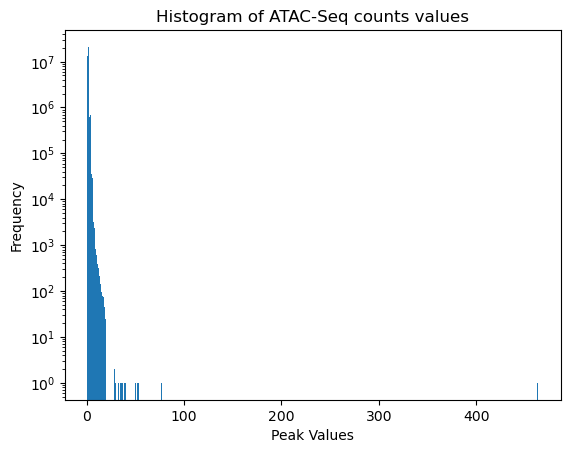

In [11]:
# Plot a histogram of all counts values

peak_values, counts = np.unique(adata.X.data, return_counts=True)
plt.bar(peak_values, counts)
plt.xlabel('Peak Values')
plt.ylabel('Frequency')
plt.title('Histogram of ATAC-Seq counts values')
plt.yscale('log')
plt.show()

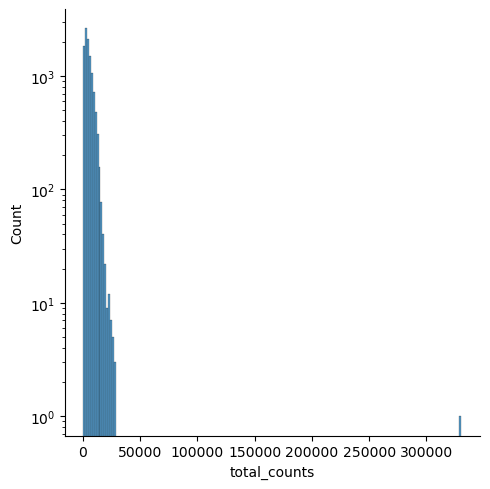

In [12]:
sns.displot(adata.obs["total_counts"], kind='hist', log_scale=(False, True), bins=200)

## 7. Filter out that one big cell

In [13]:
sc.pp.filter_cells(adata, max_counts=50000)

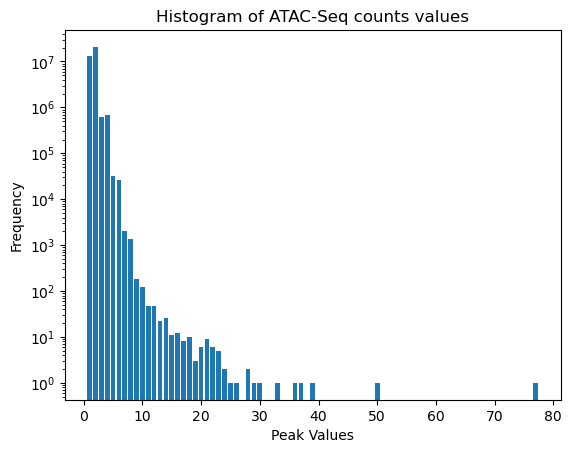

In [14]:
# Plot a histogram of all counts values

peak_values, counts = np.unique(adata.X.data, return_counts=True)
plt.bar(peak_values, counts)
plt.xlabel('Peak Values')
plt.ylabel('Frequency')
plt.title('Histogram of ATAC-Seq counts values')
plt.yscale('log')
plt.show()

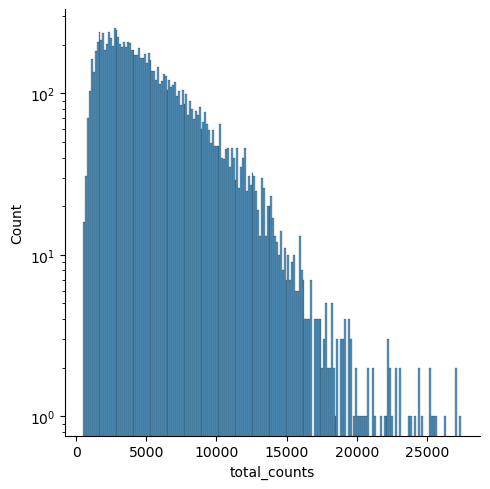

In [15]:
sns.displot(adata.obs["total_counts"], kind='hist', log_scale=(False, True), bins=200)